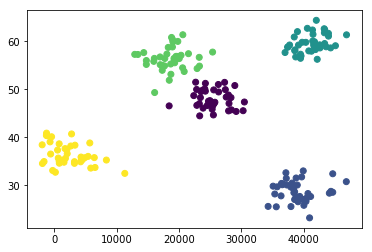

In [1]:
%matplotlib inline
import numpy as np
from pylab import *
from sklearn import svm, datasets

def handleCreateCluster( N, K ) :
    X = []
    Y = []
    fltPointsPerCluster = float(N) / K
    for i in range( K ) :
        ageCentroid = np.random.uniform( 20.0, 70.0 )
        incomeCentroid = np.random.uniform( 2000.0, 50000.0 )
        for j in range( int( fltPointsPerCluster ) ) : 
            X.append( [np.random.normal( incomeCentroid, 2500 ), np.random.normal( ageCentroid, 2.0 )] )
            Y.append( i )
    X = np.array( X )
    Y = np.array( Y )
    return X, Y
        
( X, Y ) = handleCreateCluster( 200, 5 )

plt.scatter( X[:,0], X[:,1], c = Y.astype( np.float ) )
plt.show()

In [2]:
# liner svc to partition graph into cluster
C = 1.0
svc = svm.SVC( kernel = 'linear', C = C ).fit( X, Y )

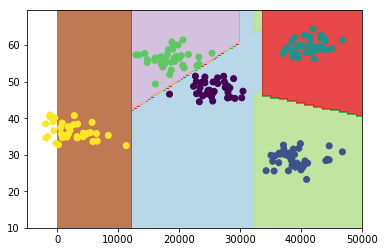

In [3]:
#setup a dense mesh to setup the points in the grid and classify them and then render different reagions with different colors

def handlePlotPrediction( clf ) :
    xx, yy = np.meshgrid( np.arange( 0, 50000, 10 ), np.arange( 10, 70, 0.5 ) )
    predictions = clf.predict( np.c_[xx.ravel(), yy.ravel()])
    predictions =  predictions.reshape( xx.shape )
    
    plt.contourf( xx, yy, predictions, cmap = plt.cm.Paired, alpha = 0.8 )
    plt.scatter( X[:,0], X[:,1], c = Y.astype( np.float ) )
    plt.show()

handlePlotPrediction( svc )